In [1]:
from scripts.halo_analysis_scripts import *
from scripts.analytic_modeling import Simulation, Potential_FIRE, velocity_COM, spherical_velocities, excise_satellites
from astropy import units as un, constants as cons
%matplotlib inline
import smplotlib

import WiersmaCooling as Cool
import cooling_flow as CF
import HaloPotential as Halo


import matplotlib as mpl
plt.rcParams.update({'font.size': 18})
mpl.rcParams['mathtext.default'] = 'regular'

import pylab as pl
import matplotlib
# some figure definitions
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rc('font', family='serif', size=12)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True

In [2]:
potential = Halo.PowerLaw(m=-0.1,vc_Rvir=200*un.km/un.s,Rvir=200*un.kpc)

In [3]:
Z2Zsun = 1/3.
z = 0.
cooling = Cool.Wiersma_Cooling(Z2Zsun,z)

In [8]:
max_step = 0.1                         #lowest resolution of solution in ln(r)
R_min    = 1*un.kpc                  #inner radius of supersonic part of solution
R_max    = 2.*potential.Rvir          #outer radius of integration
R_sonic  = 20*un.kpc  #sonic radii
transsonic_solutions = []
alphas = [0.4,0.1]
for alpha in alphas:
    print('R_sonic = %s'%R_sonic)
    transsonic_solutions.append(CF.shoot_from_sonic_point(potential,
                                                    cooling,
                                                    R_sonic,
                                                    R_max,
                                                    R_min,
                                                    max_step=max_step,
                                                    alpha=alpha,
                                                    pr=True))

R_sonic = 20.0 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=49 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=95 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.375006;  maximum r=142 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.437506;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.406256;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.390631;  maximum r=151 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.398444;  maximum r=156 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.402350;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.400397;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.399420;  maximum r=156 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.399908;  no transsonic solutions

In [4]:
R_circ = 0.05*potential.Rvir                # circularization radius
R_max    = 10.*potential.Rvir          #outer radius of integration
Mdot  = 50.*un.Msun/un.yr  # mass inflow rates
transsonic_solutions = []
alphas = np.arange(0,1.1,0.1)
for alpha in alphas:
    print('Mdot = %s'%Mdot)
    transsonic_solutions.append( CF.shoot_from_R_circ(potential,
                                                   cooling,
                                                   R_circ,
                                                   Mdot,
                                                   R_max,
                                                   max_step=0.1,
                                                   pr=True,alpha=alpha))

Mdot = 50.0 solMass / yr
Integrated with log T(R_circ)=4.50, maximum radius reached 122 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.25, maximum radius reached 39 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.38, maximum radius reached 687 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.31, maximum radius reached 154 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.34, maximum radius reached 976 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.36, maximum radius reached 1449 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.35, maximum radius reached 1999 kpc, stop reason: max R reached
Mdot = 50.0 solMass / yr
Integrated with log T(R_circ)=4.50, maximum radius reached 89 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.25, maximum radius reached 169 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.38, maximum radius reached 213 kpc, stop reason: unbound
Integrated with log T(R_circ)=4.31, ma

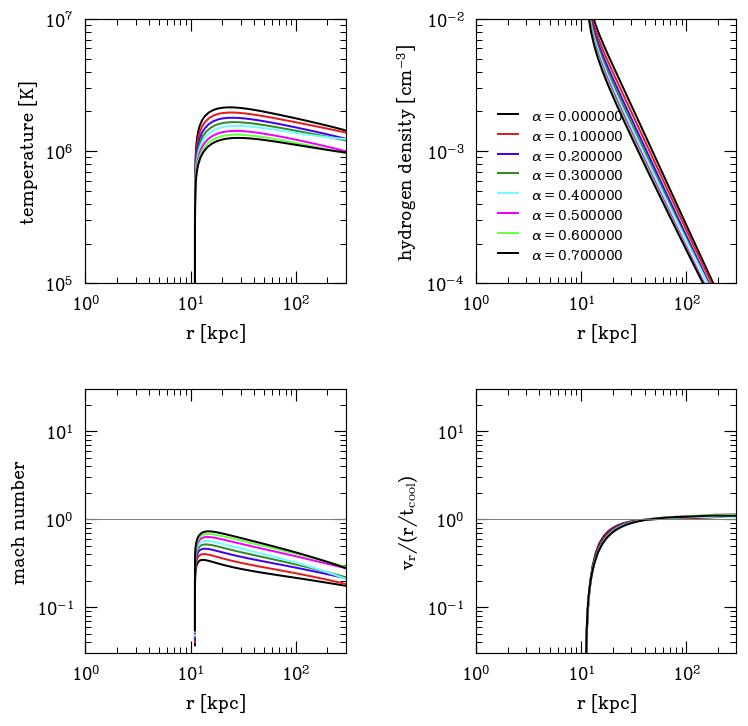

In [7]:
fig = pl.figure(figsize=(7,7),dpi=120)
pl.subplots_adjust(hspace=0.4,wspace=0.5)
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    for ires,res in enumerate(transsonic_solutions):
        if res is None: continue
        c= None
        ls = '-'
#         label = r'$\dot{M} = %d$'%res.Mdot.value
        label = r'$\alpha = %f$'%alphas[ires]
        if iPanel==0: ys = res.Ts()
        if iPanel==1: ys = res.nHs()
        if iPanel==2: ys = res.Ms()
        if iPanel==3: ys = res.t_cools() / res.t_flows()
        pl.loglog(res.Rs(),ys,c=c,ls=ls,label=label)
        pl.xlim(1,300)
        pl.xlabel(r'$r$ [kpc]')
        if iPanel==0:
            pl.ylabel(r'temperature [K]')
            pl.ylim(1e5,1e7)            
        if iPanel==1: 
            pl.ylabel(r'hydrogen density [cm$^{-3}$]')
            pl.ylim(1e-4,1e-2)
            pl.legend(loc='lower left',fontsize=10,handlelength=1.2)
        if iPanel==2: 
            pl.ylabel(r'mach number')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)
        if iPanel==3: 
            pl.ylabel(r'$v_r / (r/t_{\rm cool})$')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)